In [21]:
#Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading dataset

df = pd.read_csv(r'C:\Users\KEWIN\OneDrive\Desktop\tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
#EXPLORATORY DATA ANALYSIS(EDA)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
df.shape

(418, 12)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
#DATA PREPROCESSING
## Finding the Null value in data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
def missing (data):
    missing_number = data.isnull().sum().sort_values(ascending=False)
    missing_percent = (data.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [9]:
missing(df)

,Missing_Number,Missing_Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


In [10]:
#Removing the null value from the data set
# Filled the missing value in Age column with the mean value
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Filled the missing value in Fare columns with mean Value
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

# Filled the missing value in Embarked columns with backfill method
df['Embarked'] = df['Embarked'].fillna(method='backfill')

In [11]:
# Drop the columns 
df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S


In [12]:
df['Embarked'] = df['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype(int)
df['Sex'] = df['Sex'].map( {'female': 1,'male':0}).astype(int)

In [13]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [14]:
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)

In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7,0
1,1,3,1,47,1,0,7,1
2,0,2,0,62,0,0,9,0
3,0,3,0,27,0,0,8,1
4,1,3,1,22,1,1,12,1


In [22]:
#spliting the data
Train = df.drop(['Survived'], axis=1)
Test = df.iloc[:,1]
x_train, x_test, y_train, y_test = train_test_split(Train, Test, test_size = 0.2, random_state = 1)

In [23]:
#logistic regression model
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
print("Training set score: {:.2f}".format(lr.score(x_train, y_train)),'\n')
print("Test set score: {:.2f}".format(lr.score(x_test, y_test)),'\n')
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_lr)),'\n')
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_lr),'\n')

Training set score: 0.99 

Test set score: 1.00 

Accuracy Score: 1.00 

Classification_Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        45

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Confusion Matrix: 
 [[16  0  0]
 [ 0 23  0]
 [ 0  0 45]] 



In [18]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred_lr) * 100
print("Logistic Regression Accuracy:  " +str(round(accuracy,2)) + '%')
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_lr))
print('MSE:', metrics.mean_squared_error(y_test,y_pred_lr))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test,y_pred_lr)))

Logistic Regression Accuracy:  97.62%
MAE: 0.023809523809523808
MSE: 0.023809523809523808
RMSE: 0.1543033499620919


In [19]:
#decision tree classifier
decc = DecisionTreeClassifier()
decc.fit(x_train,y_train)
y_pred_decc = decc.predict(x_test)

print("Training set score: {:.2f}".format(decc.score(x_train, y_train)))
print("Test set score: {:.2f}".format(decc.score(x_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_decc)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_decc))
print("Classification_Report: \n",classification_report(y_test,y_pred_decc))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[26  0  0]
 [ 0 31  0]
 [ 0  0 69]]
Classification_Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        69

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



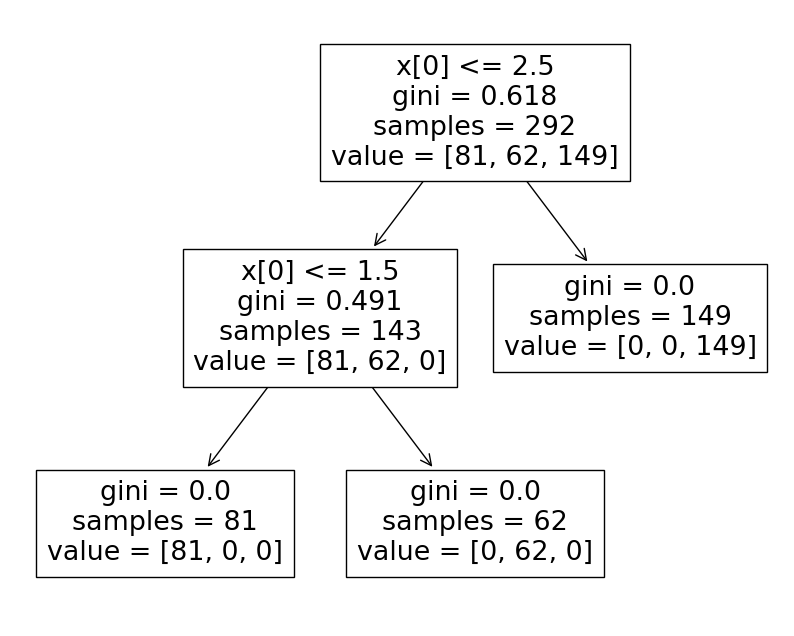

In [20]:
##Visualize decision-trees
plt.figure(figsize=(10,8))

from sklearn import tree
tree.plot_tree(decc.fit(x_train, y_train)) 
plt.show()

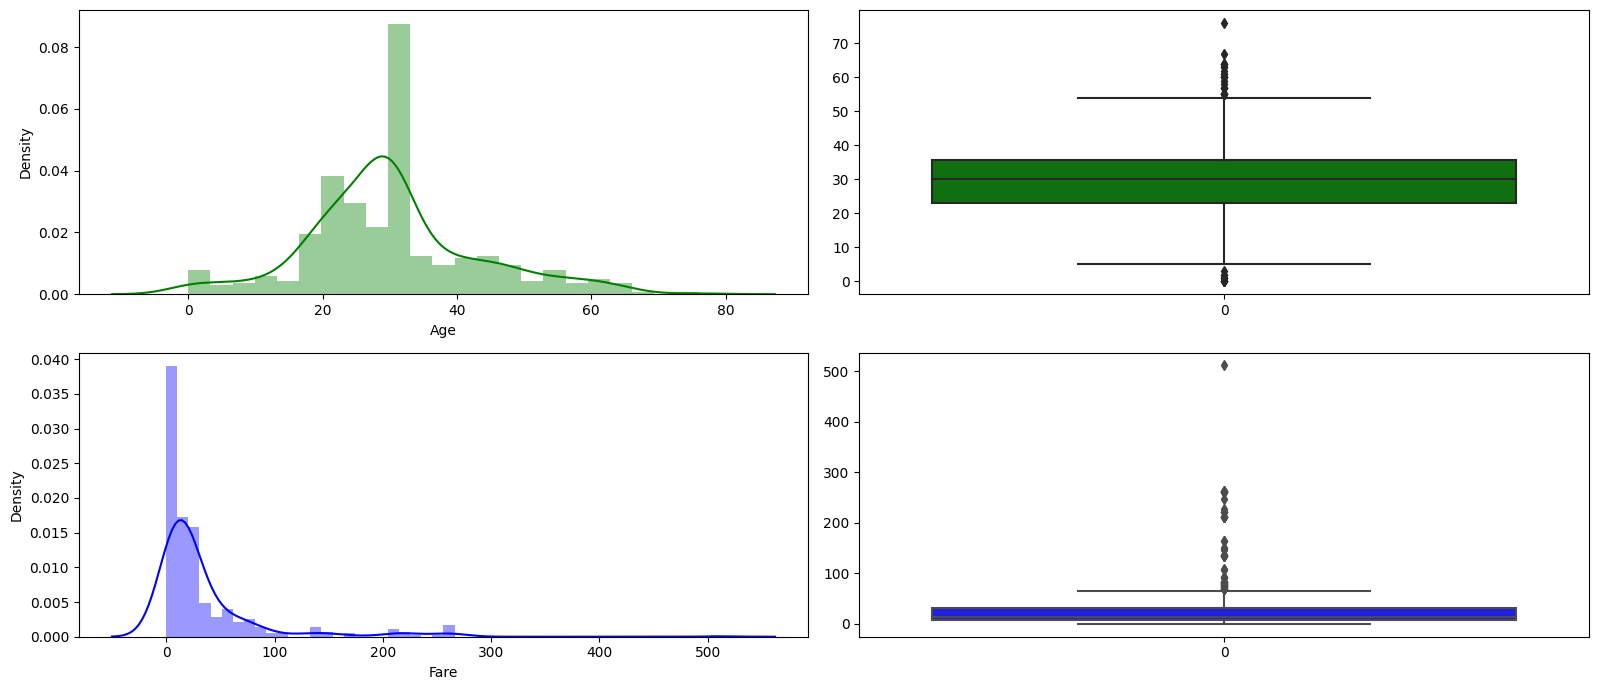

In [26]:
#data visualiztion
plt.figure(figsize=(16,7))

plt.subplot(2,2,1)
sns.distplot(df['Age'],color='green')
plt.subplot(2,2,2)
sns.boxplot(df['Age'],color='green')

plt.subplot(2,2,3)
sns.distplot(df['Fare'],color='Blue')
plt.subplot(2,2,4)
sns.boxplot(df['Fare'],color='Blue')

plt.tight_layout()
plt.show()

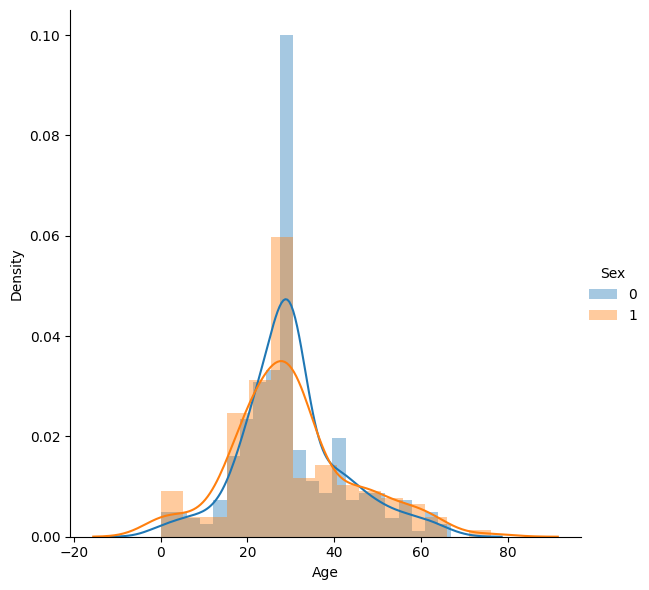

In [28]:
sns.FacetGrid(df, hue='Sex', height=6).map(sns.distplot, 'Age').add_legend()
plt.show()

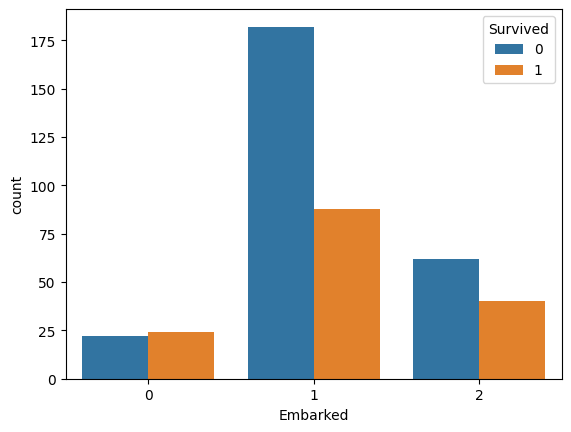

In [29]:
sns.countplot(data = df,x= 'Embarked',hue='Survived')
plt.show()